In [ ]:
## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
Amazonuk = pd.read_csv("amz_uk_price_prediction_dataset.csv")
Amazonuk.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
# Crosstab
crosstab = pd.crosstab(Amazonuk['category'], Amazonuk['isBestSeller'])

#  proportion 
crosstab['proportion_best_sellers'] = crosstab[True] / (crosstab[True] + crosstab[False])

# Sort 
sorted_crosstab = crosstab.sort_values('proportion_best_sellers', ascending=False)
print(sorted_crosstab)

isBestSeller                      False  True  proportion_best_sellers
category                                                              
Grocery                            9008   556                 0.058135
Smart Home Security & Lighting       98     6                 0.057692
Health & Personal Care             9017   552                 0.057686
Mobile Phone Accessories            248    11                 0.042471
Power & Hand Tools                 8353   306                 0.035339
...                                 ...   ...                      ...
CD, Disc & Tape Players            8798     0                 0.000000
General Music-Making Accessories    259     0                 0.000000
Snowboard Boots                    1449     0                 0.000000
Boxes & Organisers                  911     0                 0.000000
eBook Readers & Accessories         246     0                 0.000000

[296 rows x 3 columns]


In [9]:
from scipy.stats import chi2_contingency

In [10]:
# Chi-square test
chi2, p, _, _ = chi2_contingency(pd.crosstab(Amazonuk['category'], Amazonuk['isBestSeller']))

In [12]:
print(f"Chi-square test statistic: {chi2}, p-value: {p}")

Chi-square test statistic: 36540.20270061387, p-value: 0.0


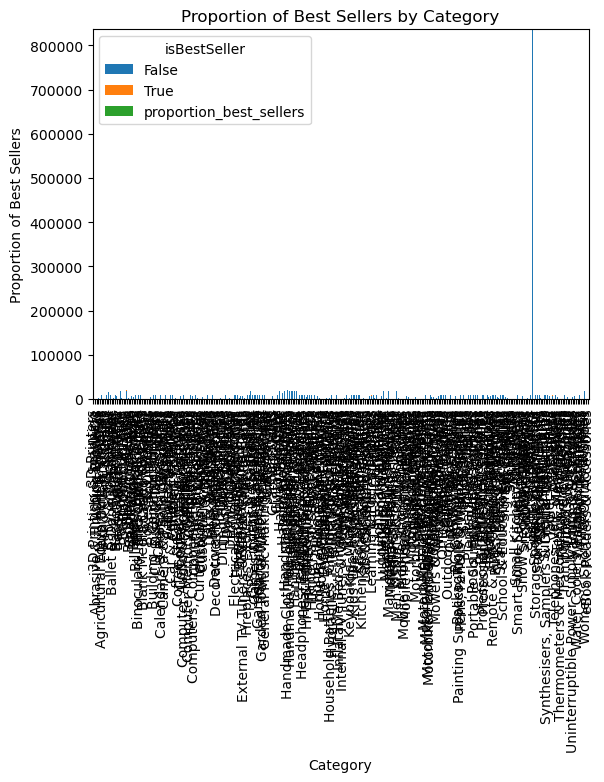

In [11]:
# Stacked bar chart
# Vizualisations
crosstab.plot(kind='bar', stacked=True)
plt.xlabel('Category')
plt.ylabel('Proportion of Best Sellers')
plt.title('Proportion of Best Sellers by Category')
plt.show()

In [13]:
#Part2

Q1 = Amazonuk['price'].quantile(0.25)
Q3 = Amazonuk['price'].quantile(0.75)
IQR = Q3 - Q1
Amazonuk_no_outliers = Amazonuk[(Amazonuk['price'] > (Q1 - 1.5 * IQR)) & (Amazonuk['price'] < (Q3 + 1.5 * IQR))]

In [14]:
print(Amazonuk_no_outliers)

             uid        asin  \
0              1  B09B96TG33   
1              2  B01HTH3C8S   
2              3  B09B8YWXDF   
3              4  B09B8T5VGV   
4              5  B09WX6QD65   
...          ...         ...   
2443646  2828589  B0CHSD7P2Q   
2443647  2828590  B0B7B8FNBQ   
2443648  2828591  B0BD5FL5FB   
2443649  2828592  B008OYLL4I   
2443650  2828593  B08P3W9B3T   

                                                     title  stars  reviews  \
0        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
1        Anker Soundcore mini, Super-Portable Bluetooth...    4.7    98099   
2        Echo Dot (5th generation, 2022 release) | Big ...    4.7    15308   
3        Echo Dot with clock (5th generation, 2022 rele...    4.7     7205   
4        Introducing Echo Pop | Full sound compact Wi-F...    4.6     1881   
...                                                    ...    ...      ...   
2443646  Motorbike Armour, Motorbike Clothing, Cycling ...    0.0    

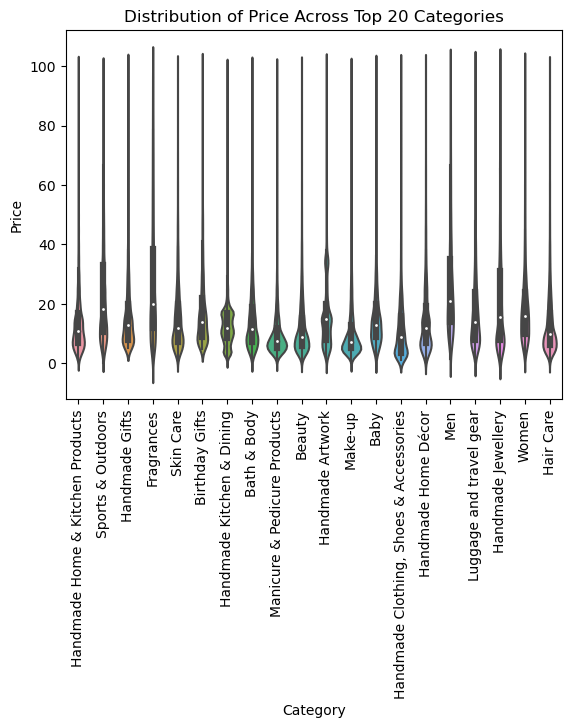

In [15]:
##**Violin Plots**:
    ##- Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
   ## - Which product category tends to have the highest median price? Don't filter here by top categories.

#  top 20 categories based on count
top_20_categories = Amazonuk_no_outliers['category'].value_counts().head(20).index
sns.violinplot(x='category', y='price', data=Amazonuk_no_outliers[Amazonuk_no_outliers['category'].isin(top_20_categories)])
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Distribution of Price Across Top 20 Categories')
plt.show()

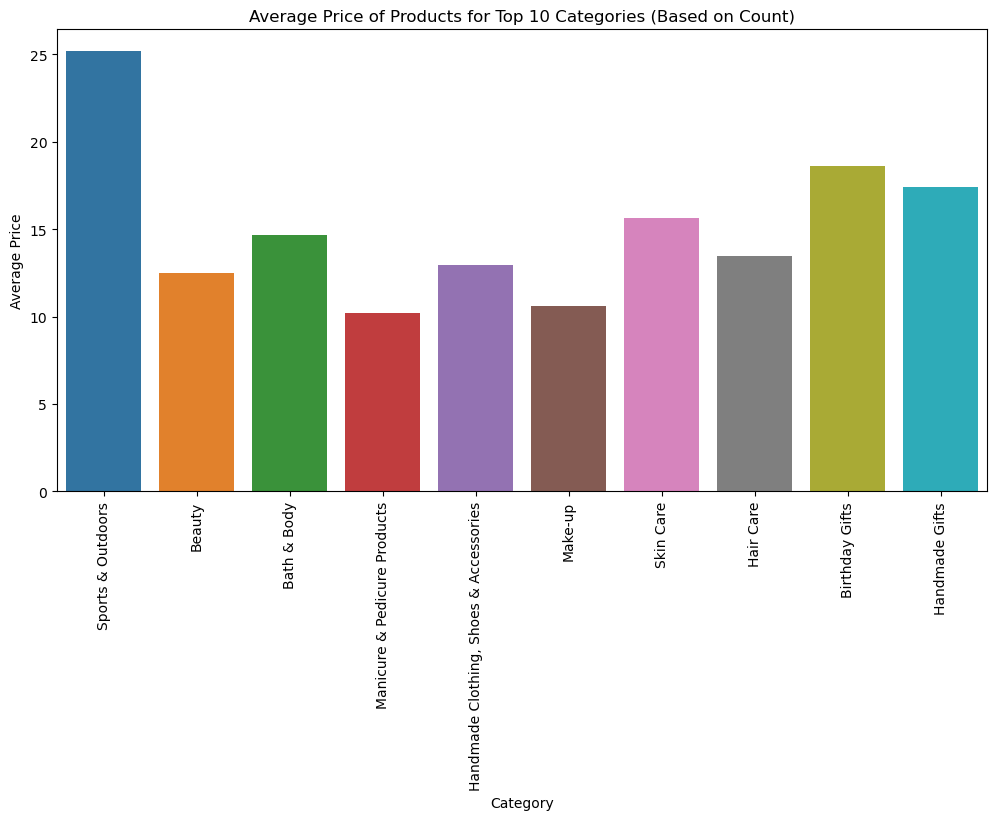

In [16]:
## **Bar Charts**:
    #Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    #Which product category commands the highest average price? Don't filter here by top categories.

# bar chart based on count 
category_counts = Amazonuk_no_outliers['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']


top_10_categories = category_counts.head(10)['category']


top_10_df = Amazonuk_no_outliers[Amazonuk_no_outliers['category'].isin(top_10_categories)]


average_prices = top_10_df.groupby('category')['price'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='price', data=average_prices, order=top_10_categories)
plt.xticks(rotation=90)
plt.title('Average Price of Products for Top 10 Categories (Based on Count)')
plt.ylabel('Average Price')
plt.xlabel('Category')
plt.show()

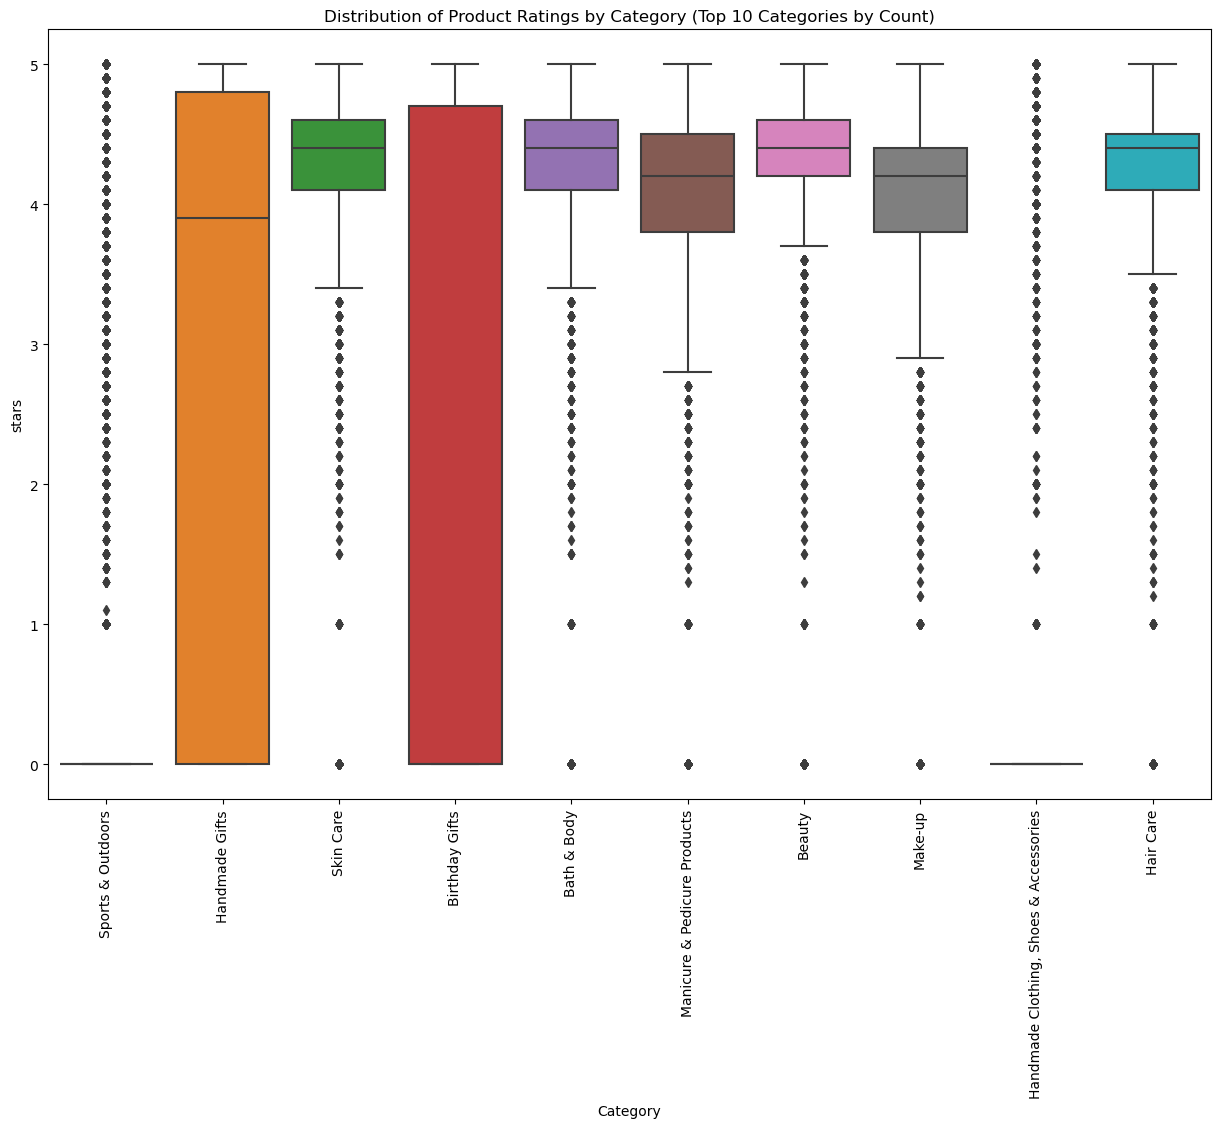

In [17]:
# Box plots 
category_counts = Amazonuk_no_outliers['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']


top_10_categories = category_counts.head(10)['category']


top_10_df = Amazonuk_no_outliers[Amazonuk_no_outliers['category'].isin(top_10_categories)]


plt.figure(figsize=(15, 10))
sns.boxplot(x='category', y='stars', data=top_10_df)
plt.xticks(rotation=90)
plt.title('Distribution of Product Ratings by Category (Top 10 Categories by Count)')
plt.xlabel('Category')
plt.ylabel('stars')
plt.show()

category    Computer Memory
stars                   4.7
Name: 56, dtype: object


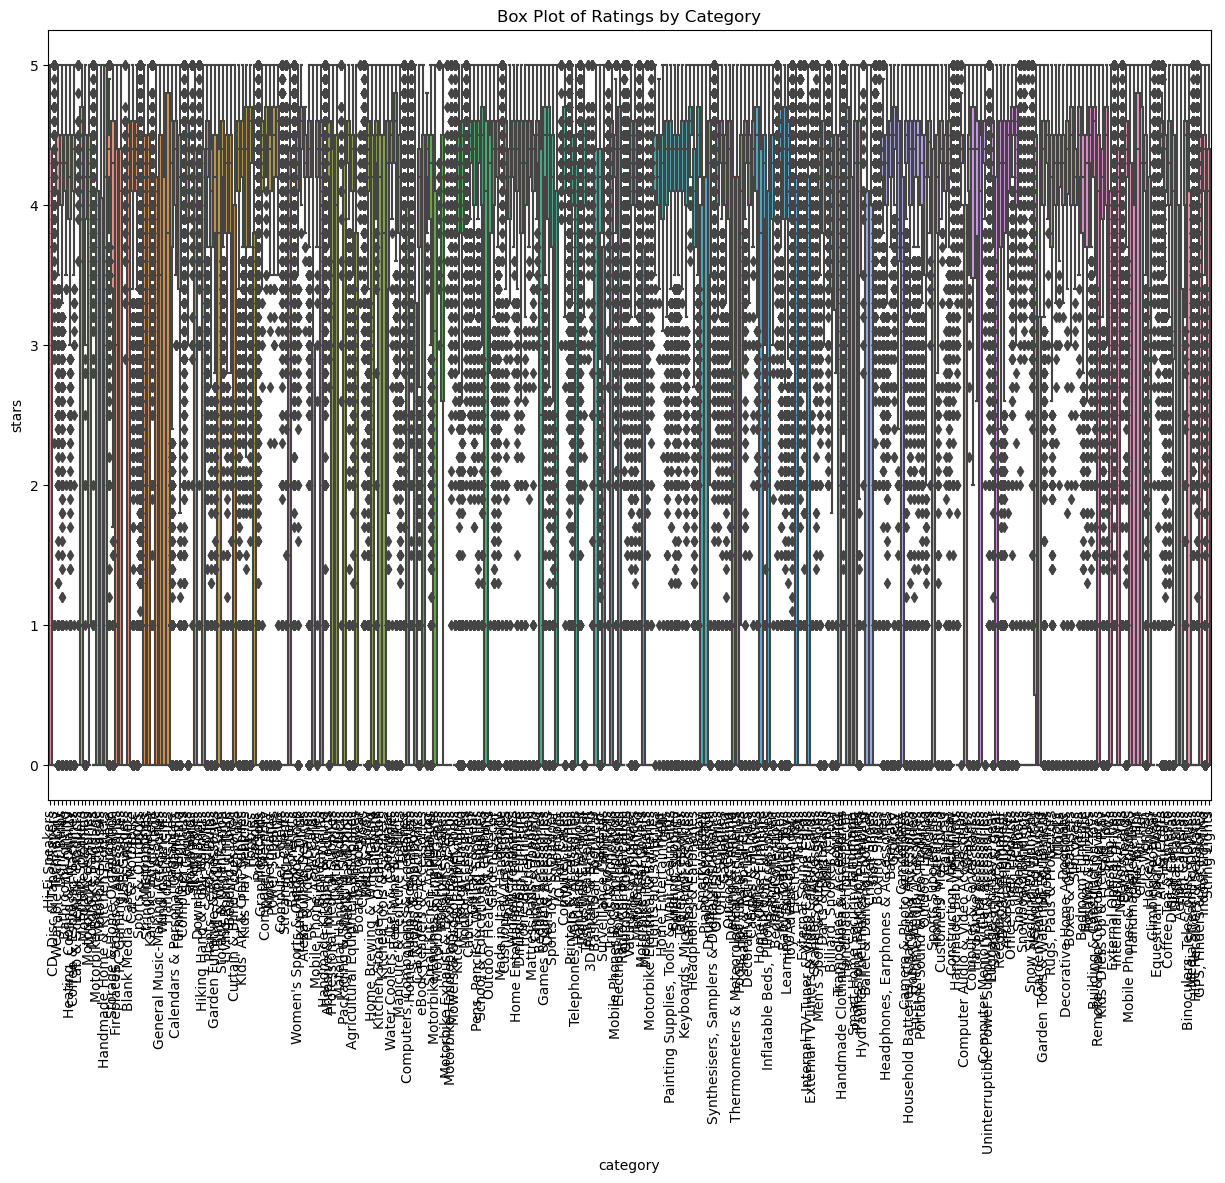

In [18]:
### Part 3: Investigating the Interplay Between Product Prices and Ratings

#**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

#**Correlation Coefficients**:
    #Calculate the correlation coefficient between `price` and `stars`.
    #Is there a significant correlation between product price and its rating?


#  median rating , no filter
median_ratings = Amazonuk.groupby('category')['stars'].median().reset_index()


sorted_median_ratings = median_ratings.sort_values(by='stars', ascending=False)


highest_median_rating_category = sorted_median_ratings.iloc[0]
print(highest_median_rating_category)


plt.figure(figsize=(15, 10))
sns.boxplot(x='category', y='stars', data=Amazonuk)
plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.title('Box Plot of Ratings by Category')
plt.show()

In [20]:
# Correlation coefficient
correlation_coefficient = Amazonuk_no_outliers['price'].corr(Amazonuk_no_outliers['stars'])
print(f"Correlation between price and rating: {correlation_coefficient}")

Correlation between price and rating: -0.0776729987818137


In [22]:
import scipy.stats as stats

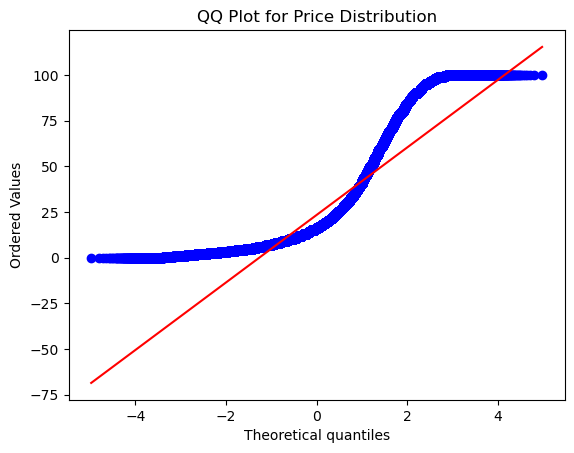

In [23]:
# **Visualizations**:
   # - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
   # - Use a correlation heatmap to visualize correlations between all numerical variables.
   # - Examine if product prices typically follow a normal distribution using a QQ plot. 

# QQ plot
stats.probplot(Amazonuk_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Price Distribution')
plt.show()